# Practice Burnup pincell
## Geometry and depletion practice
### 16 October 2022

In [1]:
import openmc
import openmc.deplete
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

## Materials

In [2]:
# create fuel material
fuel = openmc.Material(name="uo2")
fuel.add_element("U", 1, percent_type="ao", enrichment=3)
fuel.add_element("O", 2)
fuel.set_density("g/cc", 10.5)
# create clad
clad = openmc.Material(name='clad')
clad.add_element("Zr", 1)
clad.set_density("g/cc", 6.0)
#create water
water = openmc.Material(name="water")
water.add_element("H",2)
water.add_element("O",1)
water.set_density("g/cc",0.712)
water.add_s_alpha_beta('c_H_in_H2O')

materials = openmc.Materials([fuel, clad, water])

## Create Geometry
pincell geometry for burnup calculation

In [3]:
h_cell = 300; # height of pincell

r_fuel = 0.42; # fuel radius
r_pin = 0.45; # clad radius

P_D = 1.4; # pitch to diameter ratio
pitch = P_D*(2*r_pin);

fuel_temp = 900; # representaive fuel temperature (K)
mod_temp = 600; # moderator temp (K)

# fuel cylinder
fuel_cyl = openmc.model.RightCircularCylinder([0,0,-h_cell/2],h_cell,r_fuel);

fuel.volume = np.pi*(r_fuel**2)*h_cell;

# pin cylinder
pin_cyl = openmc.model.RightCircularCylinder([0,0,-(h_cell+(r_pin-r_fuel))/2],h_cell+(r_pin-r_fuel)*2,r_pin);

# pin cell container

core_cell = openmc.model.RectangularParallelepiped(-pitch/2,pitch/2,
                                                   -pitch/2,pitch/2,
                                                   -(h_cell+100)/2,(h_cell+100)/2,
                                                   boundary_type = "reflective");
fuel_cell = openmc.Cell();
fuel_cell.region = -fuel_cyl
fuel_cell.fill = fuel;
fuel_cell.temperature = fuel_temp;

clad_cell = openmc.Cell();
clad_cell.region = +fuel_cyl & -pin_cyl;
clad_cell.fill = clad;

mod_cell = openmc.Cell();
mod_cell.region = +pin_cyl & - core_cell;
mod_cell.fill = water;
mod_cell.temperature = mod_temp;

root_univ = openmc.Universe();
root_univ.add_cells([fuel_cell,clad_cell,mod_cell]);

geometry = openmc.Geometry();
geometry.root_universe = root_univ;

materials.export_to_xml();
geometry.export_to_xml();


# create criticality settings

In [4]:
settings = openmc.Settings();
settings.run_mode = 'eigenvalue';
settings.particles = 2000;
settings.batches = 100;
settings.inactive = 25;

box = openmc.stats.Box(lower_left = (-r_fuel,-r_fuel,-h_cell/2),
                      upper_right = (r_fuel,r_fuel,h_cell/2),
                      only_fissionable=True);
src = openmc.Source(space=box);

settings.source = src;
settings.temperature['method']='interpolation';
settings.export_to_xml();

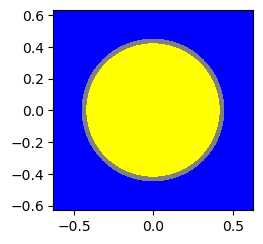

In [5]:
# create color dictionary
colors = {}
colors[water]='blue';
colors[fuel]='yellow';
colors[clad]='gray';

# plot pin cell universe to inspect geometry
root_univ.plot(width=(pitch,pitch),color_by='material',colors=colors);

# Conduct Depletion Calculation

In [6]:
model = openmc.model.Model(geometry,materials,settings)
operator = openmc.deplete.CoupledOperator(model,"chain_endfb71_pwr.xml");

# typical PWR power density
power_density = 30.5; # power density W/gHM
days = 24*3600;
time_steps = [0.5*days,0.5*days,1*days,5*days,
              23*days,150*days,365*days,365*days,
              365*days,365*days];
cecm = openmc.deplete.CECMIntegrator(operator,time_steps,power_density=power_density);

#repeat_depletion = False;

#if(repeat_depletion):
#    cecm.integrate()

cecm.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Na23 from /home/m231326/omc_data/endfb71_hdf5/Na23.h5
 Reading Mg24 from /home/m231326/omc_data/endfb71_hdf5/Mg24.h5
 Reading Mg25 from /home/m231326/omc_data/endfb71_hdf5/Mg25.h5
 Reading Mg26 from /home/m231326/omc_data/endfb71_hdf5/Mg26.h5
 Reading Al27 from /home/m231326/omc_data/endfb71_hdf5/Al27.h5
 Reading Si28 from /home/m231326/omc_data/endfb71_hdf5/Si28.h5
 Reading Si29 from /home/m231326/omc_data/endfb71_hdf5/Si29.h5
 Reading Si30 from /home/m231326/omc_data/endfb71_hdf5/Si30.h5
 Reading P31 from /home/m231326/omc_data/endfb71_hdf5/P31.h5
 Reading S32 from /home/m231326/omc_data/endfb71_hdf5/S32.h5
 Reading S33 from /home/m231326/omc_data/endfb71_hdf5/S33.h5
 Reading S34 from /home/m231326/omc_data/endfb71_hdf5/S34.h5
 Reading S36 from /home/m231326/omc_data/endfb71_hdf5/S36.h5
 Reading Cl35 from /home/m231326/omc_data/endfb71_hdf5/Cl35.h5
 Reading Cl37 from /home/m231326/omc_data/endfb71_hdf5/Cl37.h5
 Reading Ar36 from /home/m231326/omc_data/endfb71_hdf5/Ar36.h5


 Reading Ar38 from /home/m231326/omc_data/endfb71_hdf5/Ar38.h5
 Reading Ar40 from /home/m231326/omc_data/endfb71_hdf5/Ar40.h5
 Reading K39 from /home/m231326/omc_data/endfb71_hdf5/K39.h5
 Reading K40 from /home/m231326/omc_data/endfb71_hdf5/K40.h5
 Reading K41 from /home/m231326/omc_data/endfb71_hdf5/K41.h5
 Reading Ca40 from /home/m231326/omc_data/endfb71_hdf5/Ca40.h5
 Reading Ca42 from /home/m231326/omc_data/endfb71_hdf5/Ca42.h5
 Reading Ca43 from /home/m231326/omc_data/endfb71_hdf5/Ca43.h5
 Reading Ca44 from /home/m231326/omc_data/endfb71_hdf5/Ca44.h5
 Reading Ca46 from /home/m231326/omc_data/endfb71_hdf5/Ca46.h5
 Reading Ca48 from /home/m231326/omc_data/endfb71_hdf5/Ca48.h5
 Reading Sc45 from /home/m231326/omc_data/endfb71_hdf5/Sc45.h5
 Reading Ti46 from /home/m231326/omc_data/endfb71_hdf5/Ti46.h5
 Reading Ti47 from /home/m231326/omc_data/endfb71_hdf5/Ti47.h5
 Reading Ti48 from /home/m231326/omc_data/endfb71_hdf5/Ti48.h5
 Reading Ti49 from /home/m231326/omc_data/endfb71_hdf5/Ti49.h

 Reading Se80 from /home/m231326/omc_data/endfb71_hdf5/Se80.h5
 Reading Se82 from /home/m231326/omc_data/endfb71_hdf5/Se82.h5
 Reading Br79 from /home/m231326/omc_data/endfb71_hdf5/Br79.h5
 Reading Br81 from /home/m231326/omc_data/endfb71_hdf5/Br81.h5
 Reading Kr78 from /home/m231326/omc_data/endfb71_hdf5/Kr78.h5
 Reading Kr80 from /home/m231326/omc_data/endfb71_hdf5/Kr80.h5
 Reading Kr82 from /home/m231326/omc_data/endfb71_hdf5/Kr82.h5
 Reading Kr83 from /home/m231326/omc_data/endfb71_hdf5/Kr83.h5
 Reading Kr84 from /home/m231326/omc_data/endfb71_hdf5/Kr84.h5
 Reading Kr85 from /home/m231326/omc_data/endfb71_hdf5/Kr85.h5
 Reading Kr86 from /home/m231326/omc_data/endfb71_hdf5/Kr86.h5
 Reading Rb85 from /home/m231326/omc_data/endfb71_hdf5/Rb85.h5
 Reading Rb86 from /home/m231326/omc_data/endfb71_hdf5/Rb86.h5
 Reading Rb87 from /home/m231326/omc_data/endfb71_hdf5/Rb87.h5
 Reading Sr84 from /home/m231326/omc_data/endfb71_hdf5/Sr84.h5
 Reading Sr86 from /home/m231326/omc_data/endfb71_hdf5/

 Reading Nb95 from /home/m231326/omc_data/endfb71_hdf5/Nb95.h5
 Reading Mo92 from /home/m231326/omc_data/endfb71_hdf5/Mo92.h5
 Reading Mo94 from /home/m231326/omc_data/endfb71_hdf5/Mo94.h5
 Reading Mo95 from /home/m231326/omc_data/endfb71_hdf5/Mo95.h5
 Reading Mo96 from /home/m231326/omc_data/endfb71_hdf5/Mo96.h5
 Reading Mo97 from /home/m231326/omc_data/endfb71_hdf5/Mo97.h5
 Reading Mo98 from /home/m231326/omc_data/endfb71_hdf5/Mo98.h5
 Reading Mo99 from /home/m231326/omc_data/endfb71_hdf5/Mo99.h5
 Reading Mo100 from /home/m231326/omc_data/endfb71_hdf5/Mo100.h5
 Reading Tc99 from /home/m231326/omc_data/endfb71_hdf5/Tc99.h5


 Reading Ru96 from /home/m231326/omc_data/endfb71_hdf5/Ru96.h5
 Reading Ru98 from /home/m231326/omc_data/endfb71_hdf5/Ru98.h5
 Reading Ru99 from /home/m231326/omc_data/endfb71_hdf5/Ru99.h5
 Reading Ru100 from /home/m231326/omc_data/endfb71_hdf5/Ru100.h5
 Reading Ru101 from /home/m231326/omc_data/endfb71_hdf5/Ru101.h5
 Reading Ru102 from /home/m231326/omc_data/endfb71_hdf5/Ru102.h5
 Reading Ru103 from /home/m231326/omc_data/endfb71_hdf5/Ru103.h5
 Reading Ru104 from /home/m231326/omc_data/endfb71_hdf5/Ru104.h5
 Reading Ru105 from /home/m231326/omc_data/endfb71_hdf5/Ru105.h5
 Reading Ru106 from /home/m231326/omc_data/endfb71_hdf5/Ru106.h5
 Reading Rh103 from /home/m231326/omc_data/endfb71_hdf5/Rh103.h5
 Reading Rh105 from /home/m231326/omc_data/endfb71_hdf5/Rh105.h5
 Reading Pd102 from /home/m231326/omc_data/endfb71_hdf5/Pd102.h5
 Reading Pd104 from /home/m231326/omc_data/endfb71_hdf5/Pd104.h5
 Reading Pd105 from /home/m231326/omc_data/endfb71_hdf5/Pd105.h5
 Reading Pd106 from /home/m2313

          1200K
          2500K


 Reading Cd110 from /home/m231326/omc_data/endfb71_hdf5/Cd110.h5
 Reading Cd111 from /home/m231326/omc_data/endfb71_hdf5/Cd111.h5
 Reading Cd112 from /home/m231326/omc_data/endfb71_hdf5/Cd112.h5
 Reading Cd113 from /home/m231326/omc_data/endfb71_hdf5/Cd113.h5
 Reading Cd114 from /home/m231326/omc_data/endfb71_hdf5/Cd114.h5
 Reading Cd115_m1 from /home/m231326/omc_data/endfb71_hdf5/Cd115_m1.h5
 Reading Cd116 from /home/m231326/omc_data/endfb71_hdf5/Cd116.h5
 Reading In113 from /home/m231326/omc_data/endfb71_hdf5/In113.h5
 Reading In115 from /home/m231326/omc_data/endfb71_hdf5/In115.h5
 Reading Sn112 from /home/m231326/omc_data/endfb71_hdf5/Sn112.h5
 Reading Sn113 from /home/m231326/omc_data/endfb71_hdf5/Sn113.h5
 Reading Sn114 from /home/m231326/omc_data/endfb71_hdf5/Sn114.h5
 Reading Sn115 from /home/m231326/omc_data/endfb71_hdf5/Sn115.h5
 Reading Sn116 from /home/m231326/omc_data/endfb71_hdf5/Sn116.h5
 Reading Sn117 from /home/m231326/omc_data/endfb71_hdf5/Sn117.h5
 Reading Sn118 from

          1200K
          2500K


 Reading Sn126 from /home/m231326/omc_data/endfb71_hdf5/Sn126.h5
 Reading Sb121 from /home/m231326/omc_data/endfb71_hdf5/Sb121.h5
 Reading Sb123 from /home/m231326/omc_data/endfb71_hdf5/Sb123.h5
 Reading Sb124 from /home/m231326/omc_data/endfb71_hdf5/Sb124.h5
 Reading Sb125 from /home/m231326/omc_data/endfb71_hdf5/Sb125.h5
 Reading Sb126 from /home/m231326/omc_data/endfb71_hdf5/Sb126.h5
 Reading Te120 from /home/m231326/omc_data/endfb71_hdf5/Te120.h5
 Reading Te122 from /home/m231326/omc_data/endfb71_hdf5/Te122.h5
 Reading Te123 from /home/m231326/omc_data/endfb71_hdf5/Te123.h5
 Reading Te124 from /home/m231326/omc_data/endfb71_hdf5/Te124.h5
 Reading Te125 from /home/m231326/omc_data/endfb71_hdf5/Te125.h5
 Reading Te126 from /home/m231326/omc_data/endfb71_hdf5/Te126.h5


          1200K
          2500K


 Reading Te127_m1 from /home/m231326/omc_data/endfb71_hdf5/Te127_m1.h5
 Reading Te128 from /home/m231326/omc_data/endfb71_hdf5/Te128.h5
 Reading Te129_m1 from /home/m231326/omc_data/endfb71_hdf5/Te129_m1.h5
 Reading Te130 from /home/m231326/omc_data/endfb71_hdf5/Te130.h5
 Reading Te132 from /home/m231326/omc_data/endfb71_hdf5/Te132.h5
 Reading I127 from /home/m231326/omc_data/endfb71_hdf5/I127.h5
 Reading I129 from /home/m231326/omc_data/endfb71_hdf5/I129.h5
 Reading I130 from /home/m231326/omc_data/endfb71_hdf5/I130.h5
 Reading I131 from /home/m231326/omc_data/endfb71_hdf5/I131.h5
 Reading I135 from /home/m231326/omc_data/endfb71_hdf5/I135.h5
 Reading Xe123 from /home/m231326/omc_data/endfb71_hdf5/Xe123.h5


 Reading Xe124 from /home/m231326/omc_data/endfb71_hdf5/Xe124.h5
 Reading Xe126 from /home/m231326/omc_data/endfb71_hdf5/Xe126.h5
 Reading Xe128 from /home/m231326/omc_data/endfb71_hdf5/Xe128.h5
 Reading Xe129 from /home/m231326/omc_data/endfb71_hdf5/Xe129.h5
 Reading Xe130 from /home/m231326/omc_data/endfb71_hdf5/Xe130.h5
 Reading Xe131 from /home/m231326/omc_data/endfb71_hdf5/Xe131.h5
 Reading Xe132 from /home/m231326/omc_data/endfb71_hdf5/Xe132.h5
 Reading Xe133 from /home/m231326/omc_data/endfb71_hdf5/Xe133.h5
 Reading Xe134 from /home/m231326/omc_data/endfb71_hdf5/Xe134.h5
 Reading Xe135 from /home/m231326/omc_data/endfb71_hdf5/Xe135.h5
 Reading Xe136 from /home/m231326/omc_data/endfb71_hdf5/Xe136.h5
 Reading Cs133 from /home/m231326/omc_data/endfb71_hdf5/Cs133.h5


          2500K


 Reading Cs134 from /home/m231326/omc_data/endfb71_hdf5/Cs134.h5
 Reading Cs135 from /home/m231326/omc_data/endfb71_hdf5/Cs135.h5
 Reading Cs136 from /home/m231326/omc_data/endfb71_hdf5/Cs136.h5
 Reading Cs137 from /home/m231326/omc_data/endfb71_hdf5/Cs137.h5
 Reading Ba130 from /home/m231326/omc_data/endfb71_hdf5/Ba130.h5
 Reading Ba132 from /home/m231326/omc_data/endfb71_hdf5/Ba132.h5
 Reading Ba133 from /home/m231326/omc_data/endfb71_hdf5/Ba133.h5


          1200K
          2500K


 Reading Ba134 from /home/m231326/omc_data/endfb71_hdf5/Ba134.h5
 Reading Ba135 from /home/m231326/omc_data/endfb71_hdf5/Ba135.h5
 Reading Ba136 from /home/m231326/omc_data/endfb71_hdf5/Ba136.h5
 Reading Ba137 from /home/m231326/omc_data/endfb71_hdf5/Ba137.h5
 Reading Ba138 from /home/m231326/omc_data/endfb71_hdf5/Ba138.h5
 Reading Ba140 from /home/m231326/omc_data/endfb71_hdf5/Ba140.h5
 Reading La138 from /home/m231326/omc_data/endfb71_hdf5/La138.h5
 Reading La139 from /home/m231326/omc_data/endfb71_hdf5/La139.h5
 Reading La140 from /home/m231326/omc_data/endfb71_hdf5/La140.h5
 Reading Ce136 from /home/m231326/omc_data/endfb71_hdf5/Ce136.h5
 Reading Ce138 from /home/m231326/omc_data/endfb71_hdf5/Ce138.h5
 Reading Ce139 from /home/m231326/omc_data/endfb71_hdf5/Ce139.h5
 Reading Ce140 from /home/m231326/omc_data/endfb71_hdf5/Ce140.h5
 Reading Ce141 from /home/m231326/omc_data/endfb71_hdf5/Ce141.h5
 Reading Ce142 from /home/m231326/omc_data/endfb71_hdf5/Ce142.h5
 Reading Ce143 from /home

          1200K
          2500K


 Reading Gd152 from /home/m231326/omc_data/endfb71_hdf5/Gd152.h5
 Reading Gd153 from /home/m231326/omc_data/endfb71_hdf5/Gd153.h5
 Reading Gd154 from /home/m231326/omc_data/endfb71_hdf5/Gd154.h5
 Reading Gd155 from /home/m231326/omc_data/endfb71_hdf5/Gd155.h5
 Reading Gd156 from /home/m231326/omc_data/endfb71_hdf5/Gd156.h5
 Reading Gd157 from /home/m231326/omc_data/endfb71_hdf5/Gd157.h5
 Reading Gd158 from /home/m231326/omc_data/endfb71_hdf5/Gd158.h5
 Reading Gd160 from /home/m231326/omc_data/endfb71_hdf5/Gd160.h5
 Reading Tb159 from /home/m231326/omc_data/endfb71_hdf5/Tb159.h5
 Reading Tb160 from /home/m231326/omc_data/endfb71_hdf5/Tb160.h5
 Reading Dy156 from /home/m231326/omc_data/endfb71_hdf5/Dy156.h5
 Reading Dy158 from /home/m231326/omc_data/endfb71_hdf5/Dy158.h5
 Reading Dy160 from /home/m231326/omc_data/endfb71_hdf5/Dy160.h5
 Reading Dy161 from /home/m231326/omc_data/endfb71_hdf5/Dy161.h5
 Reading Dy162 from /home/m231326/omc_data/endfb71_hdf5/Dy162.h5
 Reading Dy163 from /home

 Reading Cf246 from /home/m231326/omc_data/endfb71_hdf5/Cf246.h5
 Reading Cf248 from /home/m231326/omc_data/endfb71_hdf5/Cf248.h5
 Reading Cf249 from /home/m231326/omc_data/endfb71_hdf5/Cf249.h5
 Reading Cf250 from /home/m231326/omc_data/endfb71_hdf5/Cf250.h5
 Reading Cf251 from /home/m231326/omc_data/endfb71_hdf5/Cf251.h5
 Reading Cf252 from /home/m231326/omc_data/endfb71_hdf5/Cf252.h5


          1200K


 Reading Cf253 from /home/m231326/omc_data/endfb71_hdf5/Cf253.h5
 Reading Cf254 from /home/m231326/omc_data/endfb71_hdf5/Cf254.h5
 Reading Es251 from /home/m231326/omc_data/endfb71_hdf5/Es251.h5
 Reading Es252 from /home/m231326/omc_data/endfb71_hdf5/Es252.h5
 Reading Es253 from /home/m231326/omc_data/endfb71_hdf5/Es253.h5
 Reading Es254 from /home/m231326/omc_data/endfb71_hdf5/Es254.h5
 Reading Es254_m1 from /home/m231326/omc_data/endfb71_hdf5/Es254_m1.h5
 Reading Es255 from /home/m231326/omc_data/endfb71_hdf5/Es255.h5
 Reading Fm255 from /home/m231326/omc_data/endfb71_hdf5/Fm255.h5
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.29846
        2/1    1.26195
        3/1    1.19767
        4/1    1.29488
        5/1    1.28844
        6/1    1.24706
        7/1    1.

       52/1    1.22124    1.29314 +/- 0.00685
       53/1    1.28973    1.29302 +/- 0.00660
       54/1    1.30315    1.29337 +/- 0.00638
       55/1    1.34474    1.29508 +/- 0.00640
       56/1    1.23751    1.29323 +/- 0.00646
       57/1    1.31980    1.29406 +/- 0.00631
       58/1    1.29488    1.29408 +/- 0.00611
       59/1    1.37449    1.29645 +/- 0.00639
       60/1    1.29175    1.29631 +/- 0.00620
       61/1    1.30973    1.29668 +/- 0.00604
       62/1    1.31712    1.29724 +/- 0.00590
       63/1    1.34621    1.29853 +/- 0.00588
       64/1    1.32634    1.29924 +/- 0.00578
       65/1    1.28650    1.29892 +/- 0.00564
       66/1    1.36245    1.30047 +/- 0.00571
       67/1    1.29330    1.30030 +/- 0.00558
       68/1    1.31181    1.30057 +/- 0.00545
       69/1    1.29464    1.30043 +/- 0.00533
       70/1    1.39997    1.30264 +/- 0.00566
       71/1    1.32275    1.30308 +/- 0.00555
       72/1    1.25227    1.30200 +/- 0.00554
       73/1    1.31686    1.30231 

 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.28124
        2/1    1.32329
        3/1    1.27975
        4/1    1.25430
        5/1    1.28535
        6/1    1.30160
        7/1    1.31599
        8/1    1.25921
        9/1    1.31675
       10/1    1.29362
       11/1    1.32676
       12/1    1.31788
       13/1    1.21733
       14/1    1.32509
       15/1    1.33223
       16/1    1.33568
       17/1    1.27658
       18/1    1.33434
       19/1    1.33886
       20/1    1.27506
       21/1    1.28650
       22/1    1.25244
       23/1    1.28123
       24/1    1.32556
       25/1    1.26809
       26/1    1.23724
       27/1    1.25315    1.24520 +/- 0.00796
       28/1    1.25556    1.24865 +/- 0.00575
       29/1    1.27286    1.25470 +/- 0.00729
       30/

       65/1    1.24878    1.28229 +/- 0.00492
       66/1    1.25026    1.28151 +/- 0.00487
       67/1    1.28855    1.28168 +/- 0.00475
       68/1    1.30109    1.28213 +/- 0.00466
       69/1    1.23531    1.28106 +/- 0.00468
       70/1    1.27085    1.28084 +/- 0.00458
       71/1    1.20092    1.27910 +/- 0.00480
       72/1    1.30620    1.27968 +/- 0.00473
       73/1    1.27127    1.27950 +/- 0.00464
       74/1    1.17740    1.27742 +/- 0.00500
       75/1    1.29188    1.27771 +/- 0.00490
       76/1    1.26219    1.27740 +/- 0.00482
       77/1    1.28462    1.27754 +/- 0.00473
       78/1    1.28221    1.27763 +/- 0.00464
       79/1    1.21711    1.27651 +/- 0.00469
       80/1    1.28478    1.27666 +/- 0.00460
       81/1    1.32634    1.27755 +/- 0.00461
       82/1    1.25663    1.27718 +/- 0.00454
       83/1    1.27052    1.27706 +/- 0.00446
       84/1    1.30266    1.27750 +/- 0.00441
       85/1    1.27650    1.27748 +/- 0.00433
       86/1    1.28848    1.27766 

[openmc.deplete] t=172800.0 s, dt=432000.0 s, source=46932.97813097093
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.22791
        2/1    1.22515
        3/1    1.28293
        4/1    1.26519
        5/1    1.26925
        6/1    1.26698
        7/1    1.31928
        8/1    1.29506
        9/1    1.24965
       10/1    1.26774
       11/1    1.28245
       12/1    1.23679
       13/1    1.33601
       14/1    1.28623
       15/1    1.25431
       16/1    1.20130
       17/1    1.31465
       18/1    1.27606
       19/1    1.26981
       20/1    1.24953
       21/1    1.33307
       22/1    1.23249
       23/1    1.28123
       24/1    1.26738
       25/1    1.27913
       26/1    1.25033
       27/1    1.26322    1.25678 +/- 0.00645
       28/1    1.26740    1.260

       65/1    1.31604    1.25939 +/- 0.00588
       66/1    1.30843    1.26059 +/- 0.00586
       67/1    1.24260    1.26016 +/- 0.00573
       68/1    1.26973    1.26038 +/- 0.00560
       69/1    1.24122    1.25995 +/- 0.00549
       70/1    1.33393    1.26159 +/- 0.00561
       71/1    1.25372    1.26142 +/- 0.00549
       72/1    1.32471    1.26277 +/- 0.00554
       73/1    1.22941    1.26207 +/- 0.00547
       74/1    1.29862    1.26282 +/- 0.00541
       75/1    1.29591    1.26348 +/- 0.00534
       76/1    1.33299    1.26484 +/- 0.00541
       77/1    1.31852    1.26587 +/- 0.00540
       78/1    1.25198    1.26561 +/- 0.00531
       79/1    1.23771    1.26509 +/- 0.00523
       80/1    1.26917    1.26517 +/- 0.00514
       81/1    1.26204    1.26511 +/- 0.00504
       82/1    1.28347    1.26544 +/- 0.00497
       83/1    1.27584    1.26561 +/- 0.00488
       84/1    1.30852    1.26634 +/- 0.00485
       85/1    1.31806    1.26720 +/- 0.00485
       86/1    1.27938    1.26740 

 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.22850
        2/1    1.19978
        3/1    1.26708
        4/1    1.18580
        5/1    1.29235
        6/1    1.23759
        7/1    1.27038
        8/1    1.22475
        9/1    1.23393
       10/1    1.23933
       11/1    1.24947
       12/1    1.24738
       13/1    1.23960
       14/1    1.30381
       15/1    1.22709
       16/1    1.27433
       17/1    1.29922
       18/1    1.25797
       19/1    1.26516
       20/1    1.26914
       21/1    1.22228
       22/1    1.22888
       23/1    1.21629
       24/1    1.24854
       25/1    1.23854
       26/1    1.27346
       27/1    1.22556    1.24951 +/- 0.02395
       28/1    1.33568    1.27823 +/- 0.03188
       29/1    1.26280    1.27438 +/- 0.02287
       30/

       64/1    1.25791    1.25570 +/- 0.00521
       65/1    1.27626    1.25622 +/- 0.00510
       66/1    1.20079    1.25487 +/- 0.00515
       67/1    1.25384    1.25484 +/- 0.00503
       68/1    1.24139    1.25453 +/- 0.00492
       69/1    1.26522    1.25477 +/- 0.00481
       70/1    1.28009    1.25533 +/- 0.00474
       71/1    1.21134    1.25438 +/- 0.00473
       72/1    1.24175    1.25411 +/- 0.00464
       73/1    1.28866    1.25483 +/- 0.00460
       74/1    1.27391    1.25522 +/- 0.00452
       75/1    1.20983    1.25431 +/- 0.00452
       76/1    1.26267    1.25447 +/- 0.00443
       77/1    1.22024    1.25382 +/- 0.00440
       78/1    1.21748    1.25313 +/- 0.00437
       79/1    1.21868    1.25249 +/- 0.00433
       80/1    1.28079    1.25301 +/- 0.00429
       81/1    1.25117    1.25297 +/- 0.00421
       82/1    1.21827    1.25236 +/- 0.00418
       83/1    1.20565    1.25156 +/- 0.00418
       84/1    1.27793    1.25201 +/- 0.00414
       85/1    1.18921    1.25096 

[openmc.deplete] t=15552000.0 s, dt=31536000.0 s, source=46932.97813097093
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.16000
        2/1    1.19007
        3/1    1.16701
        4/1    1.23070
        5/1    1.15890
        6/1    1.17479
        7/1    1.17298
        8/1    1.18119
        9/1    1.13916
       10/1    1.20443
       11/1    1.15924
       12/1    1.22704
       13/1    1.22232
       14/1    1.15102
       15/1    1.15350
       16/1    1.22368
       17/1    1.25497
       18/1    1.18452
       19/1    1.20169
       20/1    1.18783
       21/1    1.18446
       22/1    1.19494
       23/1    1.13112
       24/1    1.16623
       25/1    1.20170
       26/1    1.14673
       27/1    1.19051    1.16862 +/- 0.02189
       28/1    1.15952    1

       63/1    1.13649    1.12622 +/- 0.00496
       64/1    1.11776    1.12600 +/- 0.00484
       65/1    1.15459    1.12672 +/- 0.00477
       66/1    1.12364    1.12664 +/- 0.00465
       67/1    1.17460    1.12778 +/- 0.00468
       68/1    1.15249    1.12836 +/- 0.00461
       69/1    1.12498    1.12828 +/- 0.00450
       70/1    1.11031    1.12788 +/- 0.00442
       71/1    1.08229    1.12689 +/- 0.00443
       72/1    1.07886    1.12587 +/- 0.00446
       73/1    1.11726    1.12569 +/- 0.00437
       74/1    1.13897    1.12596 +/- 0.00429
       75/1    1.11029    1.12565 +/- 0.00421
       76/1    1.10394    1.12522 +/- 0.00415
       77/1    1.09940    1.12472 +/- 0.00410
       78/1    1.06834    1.12366 +/- 0.00416
       79/1    1.10206    1.12326 +/- 0.00410
       80/1    1.14742    1.12370 +/- 0.00405
       81/1    1.09114    1.12312 +/- 0.00402
       82/1    1.11196    1.12292 +/- 0.00395
       83/1    1.15649    1.12350 +/- 0.00393
       84/1    1.22316    1.12519 

 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.02928
        2/1    1.00206
        3/1    1.02114
        4/1    1.02021
        5/1    1.00532
        6/1    0.97823
        7/1    0.99361
        8/1    1.05165
        9/1    1.00853
       10/1    1.03528
       11/1    0.99712
       12/1    1.01258
       13/1    0.97807
       14/1    1.00690
       15/1    1.01713
       16/1    1.03463
       17/1    1.04265
       18/1    1.02096
       19/1    1.04711
       20/1    0.95490
       21/1    1.02213
       22/1    0.96456
       23/1    1.07157
       24/1    0.96886
       25/1    1.00123
       26/1    0.98214
       27/1    1.01023    0.99618 +/- 0.01405
       28/1    0.99741    0.99659 +/- 0.00812
       29/1    0.96369    0.98837 +/- 0.01003
       30/

       66/1    0.94766    0.97387 +/- 0.00470
       67/1    0.99890    0.97447 +/- 0.00463
       68/1    1.00922    0.97528 +/- 0.00459
       69/1    0.89361    0.97342 +/- 0.00485
       70/1    0.99518    0.97390 +/- 0.00477
       71/1    1.00414    0.97456 +/- 0.00471
       72/1    0.93999    0.97383 +/- 0.00467
       73/1    0.99524    0.97427 +/- 0.00459
       74/1    0.98245    0.97444 +/- 0.00450
       75/1    1.00566    0.97506 +/- 0.00445
       76/1    1.03692    0.97628 +/- 0.00453
       77/1    0.96220    0.97601 +/- 0.00445
       78/1    0.95995    0.97570 +/- 0.00437
       79/1    0.94575    0.97515 +/- 0.00433
       80/1    0.98157    0.97527 +/- 0.00425
       81/1    0.97000    0.97517 +/- 0.00418
       82/1    0.93815    0.97452 +/- 0.00415
       83/1    0.98137    0.97464 +/- 0.00408
       84/1    0.97420    0.97463 +/- 0.00401
       85/1    0.96441    0.97446 +/- 0.00395
       86/1    0.98456    0.97463 +/- 0.00389
       87/1    0.95091    0.97424 

[openmc.deplete] t=110160000.0 s, dt=31536000.0 s, source=46932.97813097093
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    0.90801
        2/1    0.91788
        3/1    0.91203
        4/1    0.90071
        5/1    0.87246
        6/1    0.90720
        7/1    0.88190
        8/1    0.90242
        9/1    0.88739
       10/1    0.89214
       11/1    0.88652
       12/1    0.91864
       13/1    0.91421
       14/1    0.88668
       15/1    0.90852
       16/1    0.93943
       17/1    0.88364
       18/1    0.91962
       19/1    0.86714
       20/1    0.90212
       21/1    0.91269
       22/1    0.89817
       23/1    0.93271
       24/1    0.92793
       25/1    0.88503
       26/1    0.91237
       27/1    0.96721    0.93979 +/- 0.02742
       28/1    0.90152    

       64/1    0.84565    0.87594 +/- 0.00485
       65/1    0.89396    0.87639 +/- 0.00475
       66/1    0.85699    0.87591 +/- 0.00465
       67/1    0.88964    0.87624 +/- 0.00455
       68/1    0.91192    0.87707 +/- 0.00452
       69/1    0.87856    0.87710 +/- 0.00442
       70/1    0.89566    0.87752 +/- 0.00434
       71/1    0.87886    0.87755 +/- 0.00424
       72/1    0.86284    0.87723 +/- 0.00416
       73/1    0.87573    0.87720 +/- 0.00408
       74/1    0.89267    0.87752 +/- 0.00401
       75/1    0.83816    0.87673 +/- 0.00400
       76/1    0.89921    0.87717 +/- 0.00395
       77/1    0.90502    0.87771 +/- 0.00391
       78/1    0.90256    0.87818 +/- 0.00386
       79/1    0.87354    0.87809 +/- 0.00379
       80/1    0.90846    0.87864 +/- 0.00376
       81/1    0.88113    0.87869 +/- 0.00369
       82/1    0.89330    0.87894 +/- 0.00364
       83/1    0.87296    0.87884 +/- 0.00358
       84/1    0.86202    0.87855 +/- 0.00353
       85/1    0.87185    0.87844 

 ============================>     RESULTS     <============================

 k-effective (Collision)     = 0.85185 +/- 0.00264
 k-effective (Track-length)  = 0.85179 +/- 0.00292
 k-effective (Absorption)    = 0.85415 +/- 0.00270
 Combined k-effective        = 0.85294 +/- 0.00222
 Leakage Fraction            = 0.00000 +/- 0.00000

 Creating state point openmc_simulation_n10.h5...


In [7]:
results = openmc.deplete.Results("./depletion_results.h5")

In [8]:
time,k = results.get_eigenvalue()
time /= (24*3600)



/home/m231326/anaconda3/envs/omc/lib/python3.10/site-packages/openmc/deplete/results.py:240: FutureWarning: The get_eigenvalue(...) function has been renamed get_keff and will be removed in a future version of OpenMC.
  warn("The get_eigenvalue(...) function has been renamed get_keff and "
